# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print(num_mice)

249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print(duplicate_mouse_ids)

['g989']


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_id = duplicate_mice['Mouse ID'].iloc[0]
all_data_for_duplicate_mouse = merged_data.loc[merged_data['Mouse ID'] == duplicate_mouse_id]

all_data_for_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame
num_mice_clean = clean_data['Mouse ID'].nunique()
print(num_mice_clean)


249


## Summary Statistics

In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([ 'mean', 'median', 'var', 'std', 'sem'])

summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor VOlume Std. Err.'
}, inplace=True)

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor VOlume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

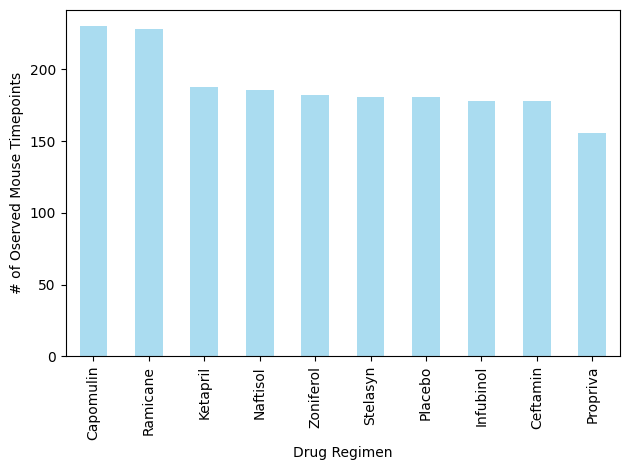

In [15]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Oserved Mouse Timepoints')


# Show the plot
plt.tight_layout()
plt.show()

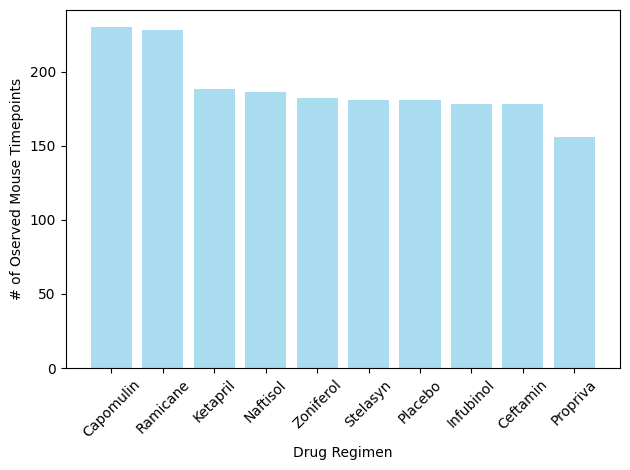

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Oserved Mouse Timepoints')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

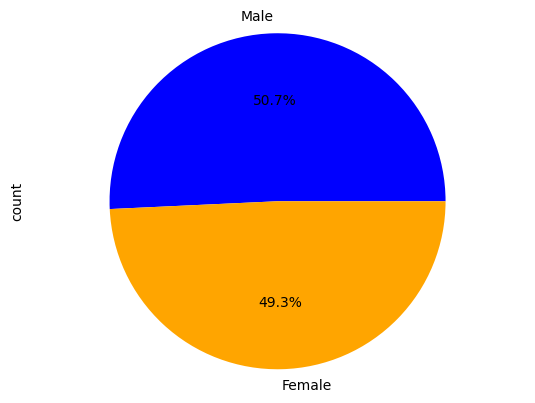

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

gender_counts.plot(kind='pie', colors=['blue', 'orange'], autopct='%1.1f%%', startangle=0)

plt.axis('equal')  
plt.show()

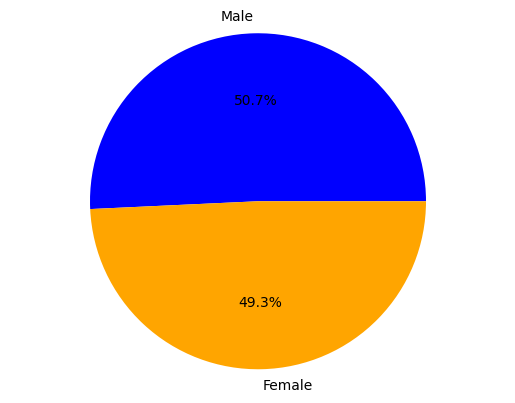

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=0)

plt.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_last_timepoint = clean_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(tumor_volume_last_timepoint, clean_data, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])

print("Final Tumor Volume for each mouse:")
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

Final Tumor Volume for each mouse:
    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
2       a262      Placebo         45           70.717621
3       a275     Ceftamin         45           62.999356
4       a366     Stelasyn         30           63.440686
..       ...          ...        ...                 ...
244     z435     Propriva         10           48.710661
245     z578     Ramicane         45           30.638696
246     z581    Infubinol         45           62.754451
247     z795     Naftisol         45           65.741070
248     z969     Naftisol         45           73.867845

[249 rows x 4 columns]


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for each treatment
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(treatment)
    print(lower_quartile)
    print(upper_quartile)
    print(iqr)
    print(outliers)

Capomulin
32.37735684
40.1592203
7.781863460000004
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
31.56046955
40.65900627
9.098536719999998
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
54.04860769
65.52574285
11.477135160000003
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
48.72207785
64.29983003
15.577752179999997
Series([], Name: Tumor Volume (mm3), dtype: float64)


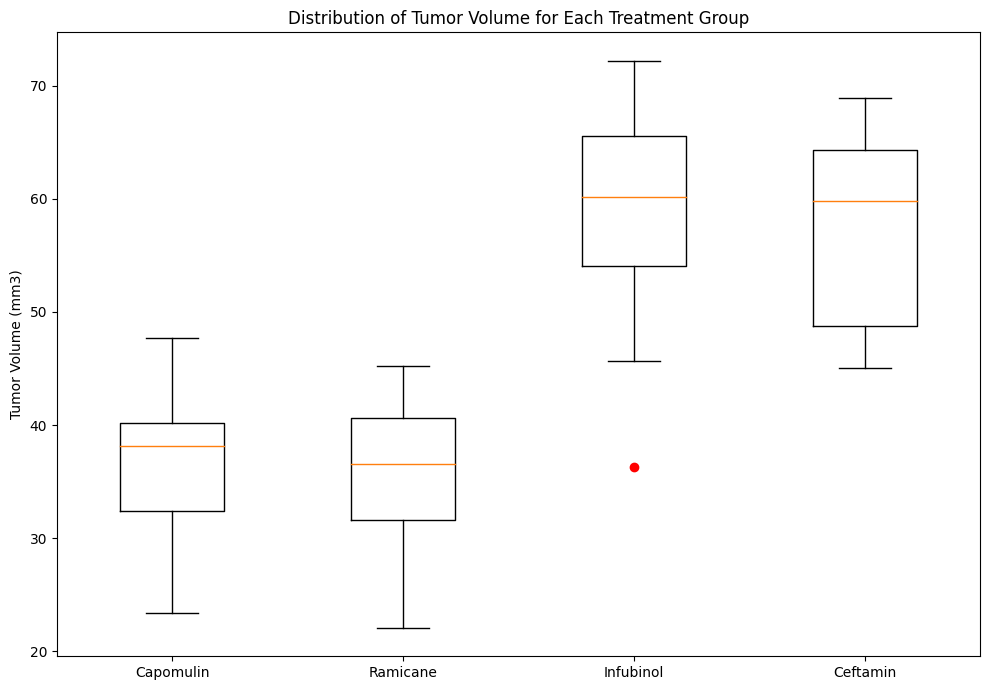

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7)) 

plt.boxplot(tumor_vol_data, labels=treatments_list, notch=False, sym='r')  

plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.tight_layout() 
plt.show()


## Line and Scatter Plots

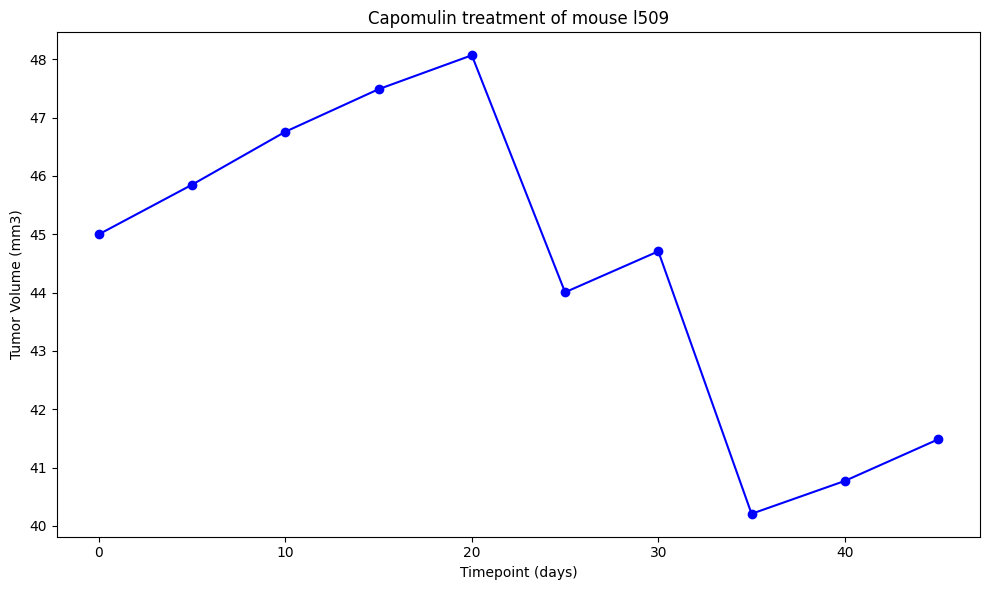

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id_capomulin = 'l509' 

mouse_data_capomulin = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id_capomulin)]

plt.figure(figsize=(10, 6))  

plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', color='b')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id_capomulin}')

plt.tight_layout()
plt.show()

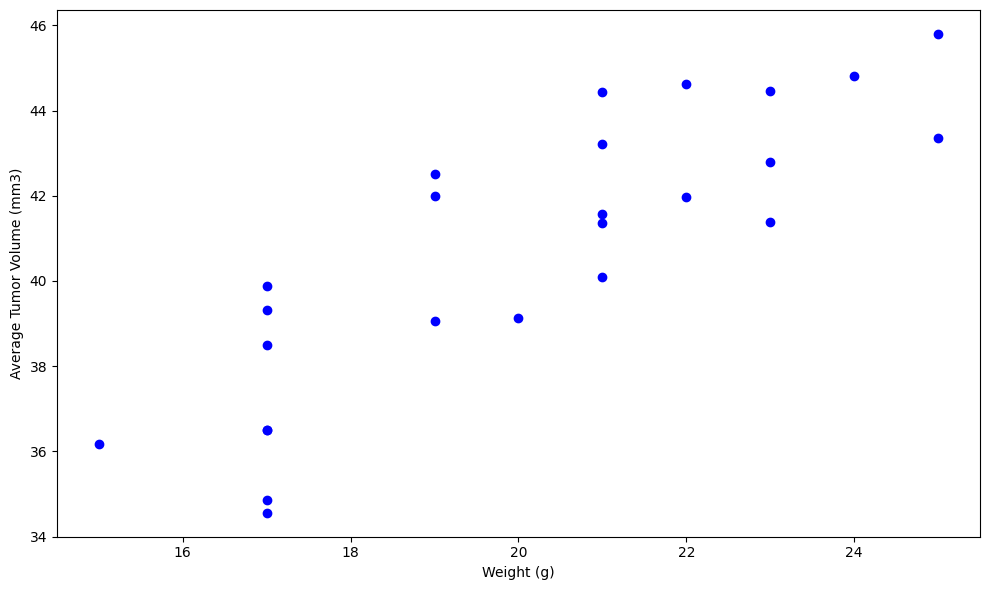

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']  

avg_weight_tumor_vol = capomulin_data.groupby('Mouse ID').agg(
    avg_weight=('Weight (g)', 'mean'),
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))  

plt.scatter(avg_weight_tumor_vol['avg_weight'], avg_weight_tumor_vol['avg_tumor_volume'], color='b')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()  
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


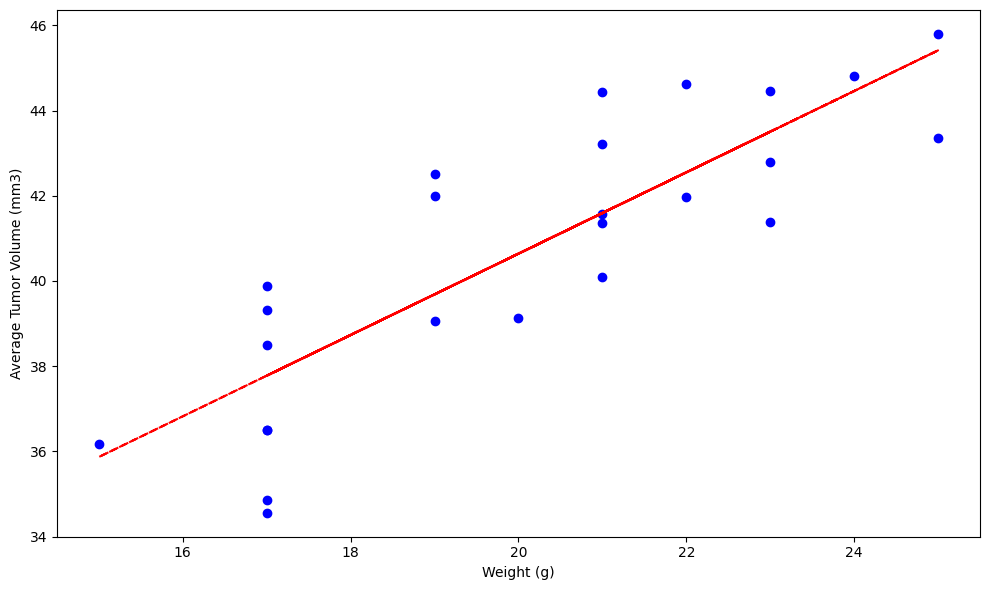

In [53]:

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(avg_weight_tumor_vol['avg_weight'], avg_weight_tumor_vol['avg_tumor_volume'])[0]

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(avg_weight_tumor_vol['avg_weight'], avg_weight_tumor_vol['avg_tumor_volume'])

plt.figure(figsize=(10, 6))

plt.scatter(avg_weight_tumor_vol['avg_weight'], avg_weight_tumor_vol['avg_tumor_volume'], color='b')
plt.plot(avg_weight_tumor_vol['avg_weight'], slope * avg_weight_tumor_vol['avg_weight'] + intercept, color='r', linestyle='dashed', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()